In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


# Cognifyz Technologies Internship

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from itertools import combinations
from collections import Counter
import folium
from wordcloud import WordCloud
import seaborn as sns

In [5]:
# Step 1: Preprocessing
# Load the Dataset
input_file = "Dataset .csv"

In [6]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\\u([0-9a-fA-F]{4})', lambda x: chr(int(x.group(1), 16)), text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)  
        text = text.replace('\\', '').strip()
        return text
    return text

In [7]:
data = pd.read_csv(input_file)
data = data.applymap(clean_text)

In [8]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
# Step 2: Inspect data and handle missing values
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

In [10]:
# Find and handle missing data
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())


Missing Values Before Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# Handle and Replace numeric missing values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [13]:
data[col]

0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 9551, dtype: int64

In [14]:
# Replace categorical missing values with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [15]:
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# LEVEL 1 - Task 1

In [16]:
# Analyze Top Cuisines (3 cuisines)
cuisines = data['Cuisines'].dropna().str.split(', ').explode()
top_cuisines = cuisines.value_counts().head(3)
cuisines_percentage = (top_cuisines / len(data)) * 100

print("\nTop Cuisines Analysis:")
print(top_cuisines)
print("Percentage:\n", cuisines_percentage)


Top Cuisines Analysis:
North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64
Percentage:
 North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: Cuisines, dtype: float64


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# LEVEL 1 - Task2

In [18]:
# Task: City Analysis

city_data = data['City'].value_counts()
top_city = city_data.idxmax()

average_ratings_by_city = data.groupby('City')['Aggregate rating'].mean()

highest_rating_city = average_ratings_by_city.idxmax()

print("\nCity Analysis:")
print("City with most restaurants:", top_city)
print("Number of restaurants in top city:", city_data[top_city]) 
print("\nAverage ratings for each city:")
print(average_ratings_by_city)  
print("\nCity with highest average rating:", highest_rating_city)
print("Highest average rating:", average_ratings_by_city[highest_rating_city])  


City Analysis:
City with most restaurants: New Delhi
Number of restaurants in top city: 5473

Average ratings for each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with highest average rating: Inner City
Highest average rating: 4.9


# LEVEL 1 - Task3

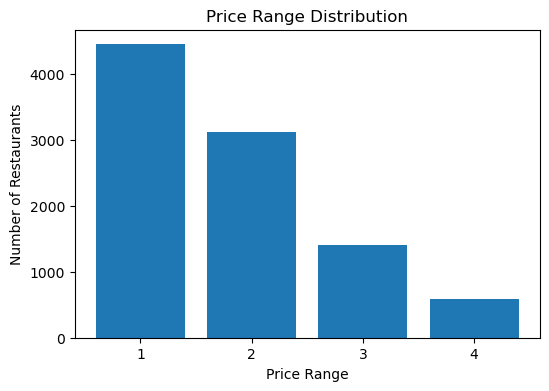


Percentage of Restaurants in Each Price Range:
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64


In [19]:
# Task: Price Range Distribution
price_range_counts = data['Price range'].value_counts().sort_index()
price_range_percentages = (price_range_counts / price_range_counts.sum()) * 100

plt.figure(figsize=(6, 4))
plt.bar(price_range_counts.index.astype(str), price_range_counts.values)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

print("\nPercentage of Restaurants in Each Price Range:")
print(price_range_percentages)

# LEVEL 1 - Task4

In [20]:
# Task: Online Delivery Analysis

online_delivery_counts = data['Has Online delivery'].value_counts()
online_delivery_percentages = (online_delivery_counts / len(data)) * 100

ratings_online_delivery = data.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nOnline Delivery Analysis:")
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_percentages)
print("\nAverage Ratings:")
print("With Online Delivery:", ratings_online_delivery.get("Yes", "No data"))
print("Without Online Delivery:", ratings_online_delivery.get("No", "No data"))


Online Delivery Analysis:
Percentage of Restaurants Offering Online Delivery:
No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

Average Ratings:
With Online Delivery: 3.2488372093023252
Without Online Delivery: 2.465295774647887
